In [1]:
# !pip install chart_studio
# !pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# from windrose import WindroseAxes
import os
%matplotlib inline

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fb2ecfbf09d64f5893a02b6c5246459e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4ZGsGNcUA1xI_LfHDY8s9-TRkLXXo3irnLyigtga6llK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb2ecfbf09d64f5893a02b6c5246459e.get_object(Bucket='windenergypredictortest-donotdelete-pr-2rw1w4x9ai0weh',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [3]:
##Energy Prediction

In [4]:
import datetime
import time

In [5]:
# data=pd.read_csv('./T1.csv')
# data.head()

In [6]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

Date/Time  ActivePower  WindSpeed       Power  WindDirection
0  01 01 2018 00:00   380.047791   5.311336  416.328908     259.994904
1  01 01 2018 00:10   453.769196   5.672167  519.917511     268.641113
2  01 01 2018 00:20   306.376587   5.216037  390.900016     272.564789
3  01 01 2018 00:30   419.645905   5.659674  516.127569     271.258087
4  01 01 2018 00:40   380.650696   5.577941  491.702972     265.674286

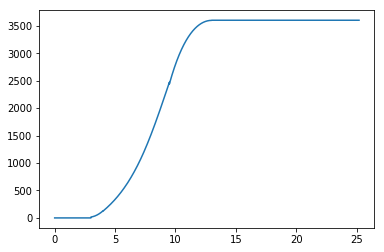

In [7]:
x=data.sort_values(by='WindSpeed')['WindSpeed']
y=data.sort_values(by='WindSpeed')['Power']

plt.plot(x,y)

In [8]:
x_train=data[['WindSpeed','WindDirection']].values
y_train=data['ActivePower'].values

In [9]:
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
xgb.__version__

'0.80'

In [10]:
model_xgb1 = xgb.XGBRegressor(max_depth = 4, learning_rate=2e-2,min_child_weight=1.1, reg_alpha=0.3,reg_lambda=0.7, nthread = -1)

In [ ]:
model_xgb1.fit(x_train,y_train)

In [ ]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

In [ ]:
r2_score(y_train,preds)

In [ ]:
model_xgb1.predict(np.array([4.1,250]).reshape(1,-1))

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [ ]:
wml_credentials = {
  "apikey": "BlmmKMg1qcP0r5Bo6rBaq5PvBiUjmrISwOVMxXNmJpuL",
  "iam_apikey_description": "Auto-generated for key 84cd1e04-0da2-4f05-b35b-24e98668287d",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/158b20b974c948719cc6ff8f2c5412d6::serviceid:ServiceId-811ba6b6-8900-4e05-96cb-59ca9c7739f1",
  "instance_id": "4dbd1d90-7016-4e23-9457-1136b504eb20",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [ ]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [ ]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "JaG",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "cse.170310312@silicon.ac.in",
    client.repository.ModelMetaNames.NAME : "Wind Energy Prediction"
    
}

In [ ]:
model_artifact = client.repository.store_model(model_xgb1, meta_props = model_props)

In [ ]:
model_artifact

In [ ]:
guid = client.repository.get_model_uid(model_artifact)

In [ ]:
guid

In [ ]:
deploy = client.deployments.create(guid, name = "WindEnergyDeploy")

In [ ]:
client.deployments.list()

In [ ]:
client.deployments.delete('44e6d787-3718-4bb3-a78b-df4558b055c1')

In [ ]:
deploy

In [ ]:
scoring_url = client.deployments.get_scoring_url(deploy)
scoring_url

In [ ]:
client.deployments.get_scoring_url(deploy)